<h2 style="text-align: center;">Análisis de encuesta CEP 2019</h2>

In [1]:
# Importamos librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import factor_analyzer as factor
import missingno as msgn

import lec7_graphs as gfx

import warnings
warnings.filterwarnings(action='ignore')

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

In [2]:
import pyreadstat

df, meta = pyreadstat.read_sav('encuesta_cep_2019.sav')

In [3]:
df.columns

Index(['ZONA', 'PROVINCIA_BD', 'COMUNA_BD', 'UMP', 'FECHAFIN', 'REGION',
       'SV_1', 'SV_2', 'SV3_1', 'SV3_2',
       ...
       'DS_P36_11', 'DS_P36_12', 'DS_P36_13', 'DS_P36_14', 'DS_P36_15',
       'DS_P36_16', 'DS_P36_17', 'DS_P37_1', 'DS_P37_2', 'PONDERADOR'],
      dtype='object', length=258)

In [4]:
# Veamos todas aquellas columnas que contienen MB_P11
# Estas son las relacionadas a la satisfaccion con instituciones y medios

trust_df = df.filter(regex='MB_P11_*')

In [5]:
trust_df.sample()

,MB_P11_1,MB_P11_2,MB_P11_3,MB_P11_4,MB_P11_5,MB_P11_6,MB_P11_7,MB_P11_8,MB_P11_9,MB_P11_10,MB_P11_11,MB_P11_12,MB_P11_13,MB_P11_14,MB_P11_15,MB_P11_16,MB_P11_17
1174,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,8.0,8.0,8.0,9.0,9.0,8.0,8.0


In [6]:
# Cambiando nombre de las columnas

trust_df = trust_df.rename(columns={
    'MB_P11_1': 'I.Catolica', 'MB_P11_2':'FF.AA',
    'MB_P11_3':'I.Evangelica', 'MB_P11_4':'Partidos Politicos',
    'MB_P11_5':'Tribunales Justicia', 'MB_P11_6':'Diarios',
    'MB_P11_7':'Television', 'MB_P11_8':'Radio',
    'MB_P11_9':'RRSS', 'MB_P11_10':'Sindicatos',
    'MB_P11_11':'Carabineros', 'MB_P11_12':'Gobierno',
    'MB_P11_13':'Congreso', 'MB_P11_14':'Empresas Privadas',
    'MB_P11_15':'Municipalidades', 'MB_P11_16':'Fiscales',
    'MB_P11_17':'PDI'
})

In [7]:
# Veamos datos perdidos

def fetch_missing(data, missing_vals = [8,9]):
    for colname, serie in data.iteritems(): #iteritms itera por columnas
        print(colname, serie.isin(missing_vals).value_counts('%')[1].round(3))
        

In [8]:
fetch_missing(trust_df)

I.Catolica 0.005
FF.AA 0.006
I.Evangelica 0.02
Partidos Politicos 0.011
Tribunales Justicia 0.008
Diarios 0.011
Television 0.008
Radio 0.013
RRSS 0.082
Sindicatos 0.061
Carabineros 0.006
Gobierno 0.009
Congreso 0.017
Empresas Privadas 0.025
Municipalidades 0.011
Fiscales 0.021
PDI 0.015


<AxesSubplot:>

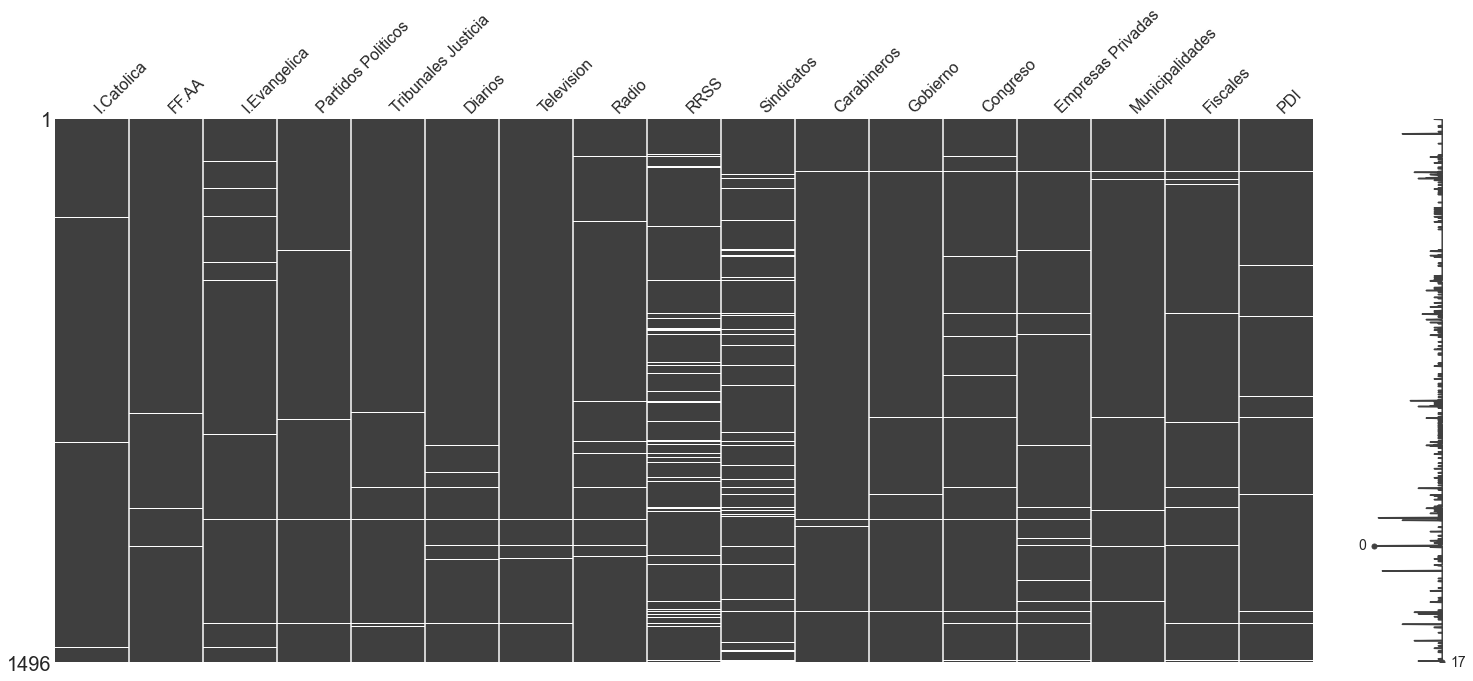

In [9]:
# Otra manera de visualizar datos perdidos

msgn.matrix(trust_df.replace([8,9], [np.nan, np.nan]))

- Se pude observar que existe una gran cantidad de datos perdidos en algunas variables, lo que implica que al hacer el estudio factorial, estas presenten una baja carga

In [10]:
# Veamos el comportamiento para las medias de cada uno de estos items

variable, mean = [], []

for colname, serie in trust_df.iteritems():
    variable.append(colname)
    mean.append(serie.mean())
    
tmp_df = pd.DataFrame({'var': variable, 'mean': mean}).sort_values(by = ['mean'])

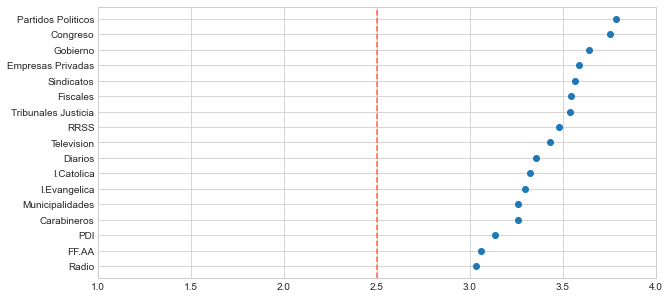

In [11]:
plt.plot(tmp_df['mean'], tmp_df['var'], 'o')
plt.axvline(x = 2.5, linestyle = '--', color = 'tomato')
plt.xlim(1, 4);

Sabemos que el 1 es mayor confianza y 4 es menor confianza en las instituciones

***Tomando como corte de separacion 2.5 entre mayor y menor confianza***
- Se obsserva que todas las instituciones presentan un importante grado de desconfianza.
- Se observa que dentro de las instituciones las que presentan una mayor confianza son radio, FF.AA y PDI con valores cercanos a 3.0.
- Aquellas que presentan la menor confianza son Partidos politicos, Congreso, Gobiernop y Empresas Privadas

### Supuestos de Ideonidad factorial

In [12]:
factor.calculate_bartlett_sphericity(trust_df)

(7040.1082928741, 0.0)

- Nuestro segundo argumento p-value indica que existe informacion suficiente para rechazar hipotesis nula, estamos en condiciones para decir que al menos existe un nivel de covarianza entre los items

In [13]:
factor.calculate_kmo(trust_df)

(array([0.88866043, 0.85558884, 0.92532325, 0.87660978, 0.90599349,
        0.89485181, 0.87585189, 0.86856852, 0.67696809, 0.80353701,
        0.86246278, 0.86756283, 0.86297001, 0.9146819 , 0.91484631,
        0.89905442, 0.91907355]),
 0.8816683723239598)

- Como el KMO global (0.88) es mayor a 0.7, podemos decir que al menos hay un factor latente que es importante a considerar
- Se observa que existen valores de kmo para variables que están bajo 0.7, por lo que podrían ser sacadas de la muestra y volver a calcular nuestro KMO Global.

### Definiendo cantidad de factores

In [14]:
# 1. Se debe indicar la cantidad de factores al instanciar la clase, y el método de rotación en el atributo "rotation"
factorize = factor.FactorAnalyzer(n_factors=7, rotation="varimax")

In [15]:
# 2. Se debe llamar al método fit, pasando como argumento el set de datos
factorize.fit(trust_df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=7, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [16]:
# 3. Se pueden obtener los eigenvalues accediendo al método get_eigenvalues, luego de aplicar fit
factor_eigenvalues = factorize.get_eigenvalues()[0]
factor_eigenvalues

array([5.22511023, 1.58933741, 1.21352241, 1.13023778, 0.93997435,
       0.85102698, 0.79508412, 0.71459518, 0.66627026, 0.62521409,
       0.58154569, 0.56195488, 0.49764843, 0.46259722, 0.42791968,
       0.37425825, 0.34370305])

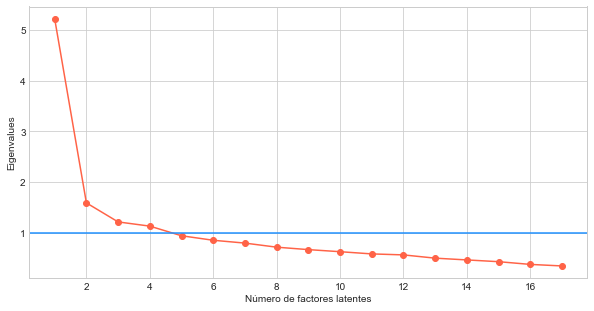

In [17]:
# 4. Al momento de graficar, debemos asignar en el eje x una lista o arreglo de valores de 1 a n,
# siendo n la cantidad de eigenvalues obtenidos. Y en el eje y los eigenvalues obtenidos.
plt.plot(np.arange(1,len(factor_eigenvalues) + 1), factor_eigenvalues, "o-", color="tomato");
plt.xlabel("Número de factores latentes");
plt.ylabel("Eigenvalues");
plt.axhline(1, color="dodgerblue")
plt.show()

- Se toma como limite todas aquellas que estan sobre el corte que sera Eigenvalues > 1, por lo que en este caso se tomarian 4 categorias latentes

In [18]:
# 5. Se actualiza la cantidad de factores, y se aplica fit
factorize_dos = factor.FactorAnalyzer(n_factors=4, rotation="varimax")
factorize_dos.fit(trust_df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [19]:
# 6. Para ver las cargas de cada factor, se accede a loadings_ dentro del objeto ya fiteado
factorize_dos.loadings_

array([[ 0.35630469,  0.08965262,  0.2342698 , -0.06906534],
       [ 0.71294992,  0.07346324,  0.19314341,  0.00544496],
       [ 0.18690733,  0.2016872 ,  0.14139654, -0.03553612],
       [ 0.10088781,  0.52547182,  0.23997892,  0.06044315],
       [ 0.17374309,  0.49495628,  0.34005601,  0.13277485],
       [ 0.18312971,  0.2564031 ,  0.61714346,  0.18433151],
       [ 0.21168516,  0.24286165,  0.60551179, -0.0793523 ],
       [ 0.19043751,  0.04098818,  0.48383358,  0.30904423],
       [-0.05717835,  0.00848648,  0.05371742,  0.49819577],
       [ 0.02938638,  0.21340227,  0.01903176,  0.4895429 ],
       [ 0.731433  ,  0.23301596,  0.1440188 ,  0.00189448],
       [ 0.53448172,  0.43410416,  0.05794855, -0.00352127],
       [ 0.24016107,  0.65729712,  0.06489075,  0.20535358],
       [ 0.22183896,  0.46177273,  0.10989318,  0.35057757],
       [ 0.41296901,  0.24449951,  0.19918417,  0.27842848],
       [ 0.295564  ,  0.46812605,  0.19754356,  0.36936787],
       [ 0.58004238,  0.

In [20]:
# 7. Podemos generar un DataFrame de la siguiente forma
loadings_df = pd.DataFrame(factorize_dos.loadings_, columns=["Factor1", "Factor2", 'Factor3', 'Factor4'] 
                           ,index=trust_df.columns)
loadings_df

,Factor1,Factor2,Factor3,Factor4
I.Catolica,0.356305,0.089653,0.234270,-0.069065
FF.AA,0.712950,0.073463,0.193143,0.005445
I.Evangelica,0.186907,0.201687,0.141397,-0.035536
Partidos Politicos,0.100888,0.525472,0.239979,0.060443
Tribunales Justicia,0.173743,0.494956,0.340056,0.132775
Diarios,0.183130,0.256403,0.617143,0.184332
Television,0.211685,0.242862,0.605512,-0.079352
Radio,0.190438,0.040988,0.483834,0.309044
RRSS,-0.057178,0.008486,0.053717,0.498196
Sindicatos,0.029386,0.213402,0.019032,0.489543


In [21]:
# 8. Destacar cargas 
loadings_df.applymap(lambda x: np.where(x < .4, " ", round(x, 2)))

,Factor1,Factor2,Factor3,Factor4
I.Catolica,,,,
FF.AA,0.71,,,
I.Evangelica,,,,
Partidos Politicos,,0.53,,
Tribunales Justicia,,0.49,,
Diarios,,,0.62,
Television,,,0.61,
Radio,,,0.48,
RRSS,,,,0.5
Sindicatos,,,,0.49


- Se observa que para el factor 1 los valores mas predominantes se encuentran en las instituciones de seguridad (FF.AA, Carabineros y PDI)
- Se observa que para el factor 2 los valors mas predominantes se encuentran en las instituciones mas institucionales (Congreso, Partidos politicos, Tribunales de Justicia)
- Se observa que para el factor 3 los valors mas predominantes se encuentran en las instituciones mas tradicionales (Diarios, Telivision y Radio)
- Se observa que para el factor 4 los valors mas predominantes se encuentran en las instituciones mas de expresion (RRSS)

In [22]:
# 9. Varianza de factores como DF
factor_var = factorize_dos.get_factor_variance()
df_fv = pd.DataFrame(
    factor_var, 
    columns=["Factor1", "Factor2", 'Factor3', 'Factor4'],
    index=["Sum of squared loadings (variance)", "Proportional variance", "Cumulative variance"] # Obtenido de documentación
)
df_fv

,Factor1,Factor2,Factor3,Factor4
Sum of squared loadings (variance),2.351202,1.972786,1.407859,1.115616
Proportional variance,0.138306,0.116046,0.082815,0.065624
Cumulative variance,0.138306,0.254352,0.337168,0.402792


- Se observa que cada una de estas dimensiones explica en un 13.8%, 11.6%, 8.3% y 6.6% respectivamente (Proportional variance) la variabilidad de los puntajes de estas dimensiones.
- En conjunto explican el 40.3% de la variabilidad

In [23]:
# 10. Obtención de scores: Usar método transform
scores = factorize_dos.transform(trust_df)
scores

array([[-0.50420624, -0.4866396 ,  0.30402515,  0.66831918],
       [-0.69207108,  0.0464015 , -1.79577588,  2.01911772],
       [ 0.82092489,  0.15299001,  0.71946184,  0.32708413],
       ...,
       [-0.4289292 , -0.80243051, -1.15711022, -0.05351693],
       [-0.25313173,  0.37781328, -1.19889419,  0.79745235],
       [-0.93983481, -0.04523063, -0.55080633,  0.06746861]])

In [24]:
score_df = pd.DataFrame(scores, columns=["Factor1", "Factor2", 'Factor3', 'Factor4'])
score_df

,Factor1,Factor2,Factor3,Factor4
0,-0.504206,-0.486640,0.304025,0.668319
1,-0.692071,0.046401,-1.795776,2.019118
2,0.820925,0.152990,0.719462,0.327084
3,0.469036,0.261289,0.773620,-0.447775
4,0.421007,0.008426,0.693718,-0.655730
...,...,...,...,...
1491,-0.371491,2.334538,-1.316622,4.454371
1492,-0.359394,-0.478720,-0.249376,-1.114712
1493,-0.428929,-0.802431,-1.157110,-0.053517
1494,-0.253132,0.377813,-1.198894,0.797452


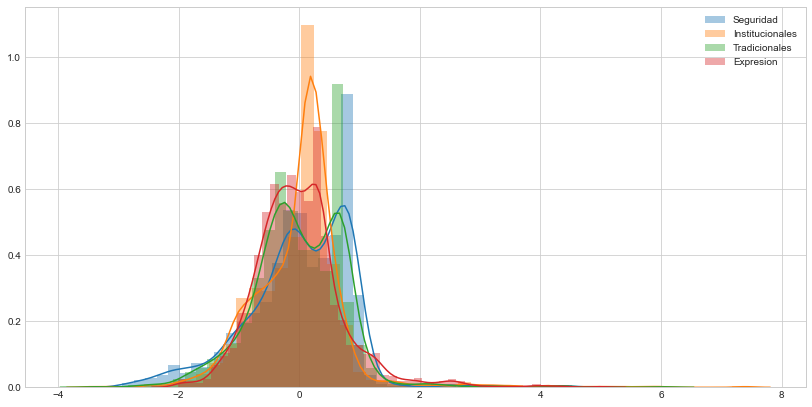

In [25]:
# 11. Distribuciones
plt.figure(figsize=(14,7))
sns.distplot(scores[:,0], label="Seguridad")
sns.distplot(scores[:,1], label="Institucionales")
sns.distplot(scores[:,2], label = 'Tradicionales')
sns.distplot(scores[:,3], label = 'Expresion')
plt.legend();

- Se puede observar que existe una leve inclinacion hacia valores mas positivos en aquellos factores de Seguridad y Tradicionales.
- Se podria desprender que existe una mejor evaluacion sobre aquellas instituciones de seguridad (carabineros, PDI, FF.AA) sobre aquellas más de nivel institucional y de expresion.